## Instalando Bibliotecas

In [ ]:
pip install yfinance

## Importando Bibliotecas

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.graph_objs as go

## 1 - Aquisição dos Dados das Ações

In [3]:
ticker = yf.Ticker('^BVSP')
#df = ticker.history(period="3y", interval ="1mo")
df = ticker.history(interval='1d', start='2019-01-01', end='2021-05-17')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 583 entries, 2019-01-02 to 2021-05-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          583 non-null    float64
 1   High          583 non-null    float64
 2   Low           583 non-null    float64
 3   Close         583 non-null    float64
 4   Volume        583 non-null    int64  
 5   Dividends     583 non-null    int64  
 6   Stock Splits  583 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 36.4 KB


In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,87887.0,91479.0,87536.0,91012.0,5615400,0,0
2019-01-03,91011.0,91596.0,89922.0,91564.0,6066200,0,0
2019-01-04,91577.0,92701.0,90824.0,91841.0,5322100,0,0
2019-01-07,91845.0,92552.0,91288.0,91699.0,4565000,0,0
2019-01-08,91699.0,92231.0,91064.0,92032.0,4496500,0,0


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-10,122038.0,122772.0,121795.0,121909.0,8219100,0,0
2021-05-11,121904.0,122964.0,120145.0,122964.0,7988600,0,0
2021-05-12,122964.0,122964.0,119458.0,119710.0,9405200,0,0
2021-05-13,119711.0,121426.0,119711.0,120706.0,9356200,0,0
2021-05-14,120719.0,122195.0,120719.0,121881.0,10136300,0,0


## 2 - Decomposição de uma série temporal

In [7]:
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 583 entries, 2019-01-02 to 2021-05-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   583 non-null    float64
dtypes: float64(1)
memory usage: 9.1 KB


In [8]:
df[['Close']].head()

,Close
Date,
2019-01-02,91012.0
2019-01-03,91564.0
2019-01-04,91841.0
2019-01-07,91699.0
2019-01-08,92032.0


In [9]:
df[['Close']].tail()

,Close
Date,
2021-05-10,121909.0
2021-05-11,122964.0
2021-05-12,119710.0
2021-05-13,120706.0
2021-05-14,121881.0


In [10]:
decomposicao = seasonal_decompose(df.Close, model='additive', freq=30,
                                  extrapolate_trend=30)

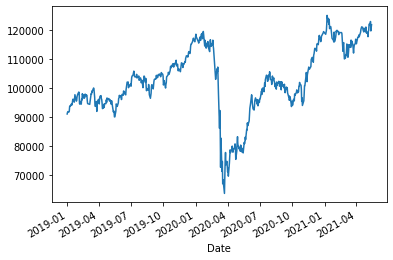

In [11]:
df.Close.plot()

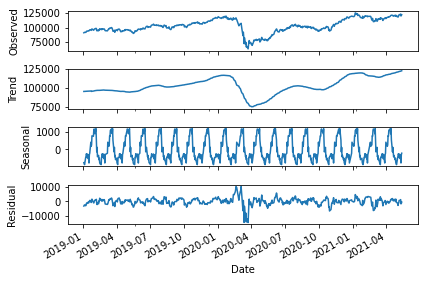

In [12]:
decomposicao.plot(); #ponto e vírgula é para não fazer os gráficos 2 vezes

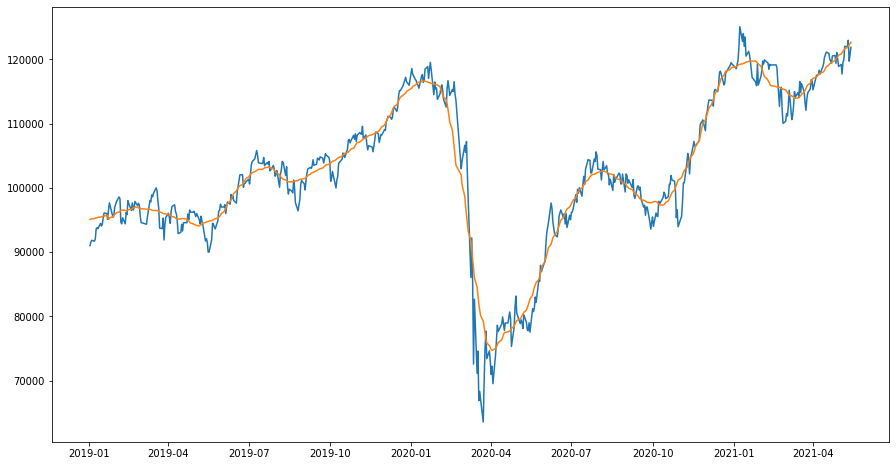

In [13]:
ax, fig = plt.subplots(figsize=(15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

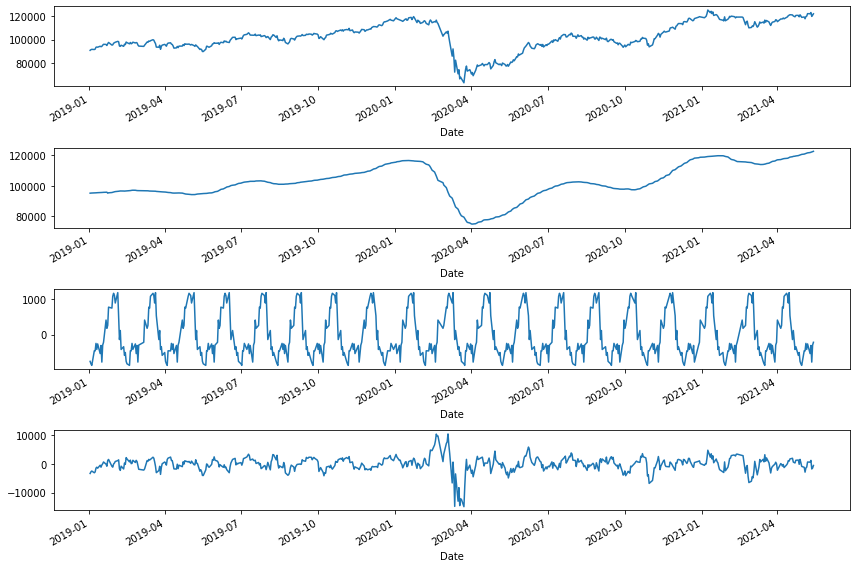

In [14]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4,1, figsize=(12,8))

decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax= ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout() #ajusta o layout

## 3 - Cálculo da Média Móvel

In [15]:
df['Close'].head()

Date
2019-01-02    91012.0
2019-01-03    91564.0
2019-01-04    91841.0
2019-01-07    91699.0
2019-01-08    92032.0
Name: Close, dtype: float64

In [16]:
df['Close'].tail()

Date
2021-05-10    121909.0
2021-05-11    122964.0
2021-05-12    119710.0
2021-05-13    120706.0
2021-05-14    121881.0
Name: Close, dtype: float64

In [17]:
df.Close.rolling(7).mean()

Date
2019-01-02              NaN
2019-01-03              NaN
2019-01-04              NaN
2019-01-07              NaN
2019-01-08              NaN
                  ...      
2021-05-10    119892.428571
2021-05-11    120473.857143
2021-05-12    120545.428571
2021-05-13    120973.142857
2021-05-14    121304.142857
Name: Close, Length: 583, dtype: float64

In [18]:
media_movel_7d = df.Close.rolling(7).mean()
media_movel_14d = df.Close.rolling(14).mean()
media_movel_21d = df.Close.rolling(21).mean()
media_movel_30d = df.Close.rolling(30).mean()

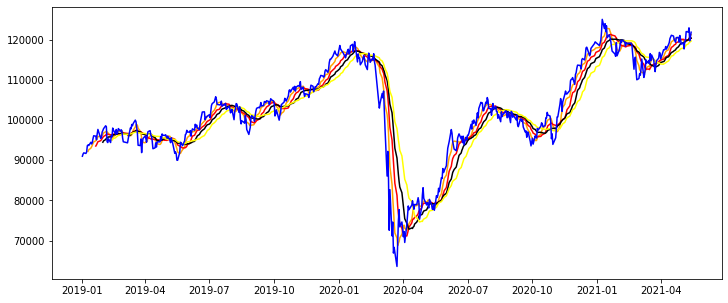

In [19]:
fig, ax= plt.subplots(figsize=(12,5))
plt.plot(media_movel_7d,'orange')
plt.plot(media_movel_14d,'red')
plt.plot(media_movel_21d,'black')
plt.plot(media_movel_30d,'yellow')
plt.plot(df.Close, 'blue')

## 4 - Extração das features

In [20]:
df = df.reset_index()

In [21]:
# criando feature ara cada período
df['year']= df.Date.dt.year
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day

In [22]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,2019-01-02,87887.0,91479.0,87536.0,91012.0,5615400,0,0,2019,1,2
1,2019-01-03,91011.0,91596.0,89922.0,91564.0,6066200,0,0,2019,1,3
2,2019-01-04,91577.0,92701.0,90824.0,91841.0,5322100,0,0,2019,1,4
3,2019-01-07,91845.0,92552.0,91288.0,91699.0,4565000,0,0,2019,1,7
4,2019-01-08,91699.0,92231.0,91064.0,92032.0,4496500,0,0,2019,1,8


In [23]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
578,2021-05-10,122038.0,122772.0,121795.0,121909.0,8219100,0,0,2021,5,10
579,2021-05-11,121904.0,122964.0,120145.0,122964.0,7988600,0,0,2021,5,11
580,2021-05-12,122964.0,122964.0,119458.0,119710.0,9405200,0,0,2021,5,12
581,2021-05-13,119711.0,121426.0,119711.0,120706.0,9356200,0,0,2021,5,13
582,2021-05-14,120719.0,122195.0,120719.0,121881.0,10136300,0,0,2021,5,14


In [24]:
#Rentabilidade = (preço atual/ preço anterior)*100 -100
df[['Close']].head()

,Close
0,91012.0
1,91564.0
2,91841.0
3,91699.0
4,92032.0


In [25]:
df[['Close']].tail()

,Close
578,121909.0
579,122964.0
580,119710.0
581,120706.0
582,121881.0


In [26]:
df[['Close']].shift() #empurra o vetor x casas para frente ou para trás

,Close
0,NaN
1,91012.0
2,91564.0
3,91841.0
4,91699.0
...,...
578,122038.0
579,121909.0
580,122964.0
581,119710.0


In [27]:
df['rentabilidade'] = df['Close']/ df.Close.shift() *100 -100

In [28]:
df.rentabilidade.head()

0         NaN
1    0.606513
2    0.302521
3   -0.154615
4    0.363145
Name: rentabilidade, dtype: float64

In [29]:
df.rentabilidade.tail()

578   -0.105705
579    0.865400
580   -2.646303
581    0.832011
582    0.973440
Name: rentabilidade, dtype: float64

In [31]:
def feature_extraction(df_):
  df_['year'] = df_['Date'].dt.year
  df_['month'] = df_.Date.dt.month
  df_['day'] = df_.Date.dt.day
  df_['rentabilidade'] = df_['Close']/ df_.Close.shift() *100 -100

In [32]:
feature_extraction(df)

In [33]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade
0,2019-01-02,87887.0,91479.0,87536.0,91012.0,5615400,0,0,2019,1,2,NaN
1,2019-01-03,91011.0,91596.0,89922.0,91564.0,6066200,0,0,2019,1,3,0.606513
2,2019-01-04,91577.0,92701.0,90824.0,91841.0,5322100,0,0,2019,1,4,0.302521
3,2019-01-07,91845.0,92552.0,91288.0,91699.0,4565000,0,0,2019,1,7,-0.154615
4,2019-01-08,91699.0,92231.0,91064.0,92032.0,4496500,0,0,2019,1,8,0.363145


In [34]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade
578,2021-05-10,122038.0,122772.0,121795.0,121909.0,8219100,0,0,2021,5,10,-0.105705
579,2021-05-11,121904.0,122964.0,120145.0,122964.0,7988600,0,0,2021,5,11,0.865400
580,2021-05-12,122964.0,122964.0,119458.0,119710.0,9405200,0,0,2021,5,12,-2.646303
581,2021-05-13,119711.0,121426.0,119711.0,120706.0,9356200,0,0,2021,5,13,0.832011
582,2021-05-14,120719.0,122195.0,120719.0,121881.0,10136300,0,0,2021,5,14,0.973440


## Hipótese 1 - Existe um mês melhor para investir no ativo

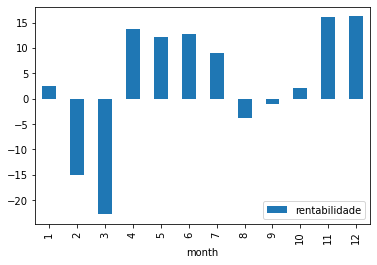

In [35]:
df.groupby('month').agg({'rentabilidade':'sum'}).plot(kind="bar")

Esses dados tem ruídos. Teria que tratar os dados. De acordo com os dados o mês 3 é o melhor para investir e o pior é o 12.

In [36]:
df.set_index('Date', inplace=True)

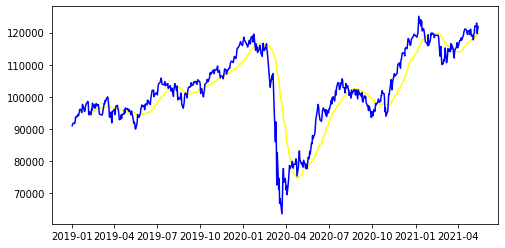

In [37]:
media_movel_30d = df.Close.rolling(30).mean()
media_movel_90d = df.Close.rolling(90).mean()
fig, ax= plt.subplots(figsize=(8,4))
#plt.plot(media_movel_90d,'black')
plt.plot(media_movel_30d,'yellow')
plt.plot(df.Close, 'blue')

## Hipótese 2 - Existe melhor dia para investir em um ativo

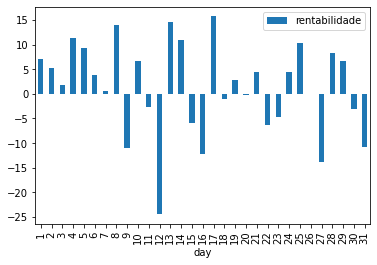

In [38]:
df.groupby('day').agg({'rentabilidade':'sum'}).plot(kind="bar")

Visualmente os dias bons para compra são 9,12,16,27,31 ... e os piore são 8,13,17...

## 5 - Correlação de Séries Temporais

In [39]:
tickers = ['VALE3.SA','PETR4.SA','BBDC4.SA','ITUB4.SA','B3SA3.SA','MGLU3.SA','CSNA3.SA','SUZB3.SA','GGBR4.SA','PRIO3.SA','VVAR3.SA','^BVSP','USDBRL=X']

In [40]:
dfs=[]

for t in tickers:
  print('Reading ticker {}...'.format(t))
  ticker = yf.Ticker(t)
  aux = ticker.history(interval='1d', start='2019-01-01',end='2021-05-17')
  aux.reset_index(inplace=True)
  aux['ticket'] = t
  dfs.append(aux)

Reading ticker VALE3.SA...
Reading ticker PETR4.SA...
Reading ticker BBDC4.SA...
Reading ticker ITUB4.SA...
Reading ticker B3SA3.SA...
Reading ticker MGLU3.SA...
Reading ticker CSNA3.SA...
Reading ticker SUZB3.SA...
Reading ticker GGBR4.SA...
Reading ticker PRIO3.SA...
Reading ticker VVAR3.SA...
Reading ticker ^BVSP...
Reading ticker USDBRL=X...


In [41]:
dfs[1]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket
0,2019-01-02,21.112864,22.657709,20.860073,22.526630,104534800,0.0,0,PETR4.SA
1,2019-01-03,22.433003,23.238195,22.283200,23.079029,95206400,0.0,0,PETR4.SA
2,2019-01-04,23.266283,23.350548,22.910500,23.144567,72119800,0.0,0,PETR4.SA
3,2019-01-07,23.266286,24.268093,23.125846,23.509716,121711900,0.0,0,PETR4.SA
4,2019-01-08,23.781235,23.799961,23.191386,23.369276,68761800,0.0,0,PETR4.SA
...,...,...,...,...,...,...,...,...,...
578,2021-05-10,24.799999,24.980000,24.580000,24.700001,73804500,0.0,0,PETR4.SA
579,2021-05-11,24.440001,25.170000,24.320000,25.150000,73729900,0.0,0,PETR4.SA
580,2021-05-12,24.950001,25.530001,24.690001,24.780001,89980700,0.0,0,PETR4.SA
581,2021-05-13,24.760000,25.100000,24.430000,24.990000,77282100,0.0,0,PETR4.SA


In [42]:
#Calcula a extração de dados para cada tipo de ação
for d in dfs:
  feature_extraction(d)

In [43]:
dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket,year,month,day,rentabilidade
0,2019-01-02,44.748259,45.965169,44.551409,45.714630,17319600,0.0,0,VALE3.SA,2019,1,2,NaN
1,2019-01-03,45.455143,45.580412,43.307658,43.844528,30120000,0.0,0,VALE3.SA,2019,1,3,-4.090817
2,2019-01-04,44.578256,46.931545,44.578256,46.698898,43360100,0.0,0,VALE3.SA,2019,1,4,6.510208
3,2019-01-07,47.307355,48.005290,46.278352,46.448360,20998900,0.0,0,VALE3.SA,2019,1,7,-0.536496
4,2019-01-08,46.707844,47.244714,46.188866,46.895748,19925600,0.0,0,VALE3.SA,2019,1,8,0.963194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-05-10,119.800003,120.449997,114.690002,114.690002,38889400,0.0,0,VALE3.SA,2021,5,10,-0.658289
579,2021-05-11,113.980003,118.720001,113.320000,118.720001,28693600,0.0,0,VALE3.SA,2021,5,11,3.513819
580,2021-05-12,118.000000,118.459999,113.959999,114.330002,31737900,0.0,0,VALE3.SA,2021,5,12,-3.697776
581,2021-05-13,112.000000,114.220001,110.720001,112.489998,34338500,0.0,0,VALE3.SA,2021,5,13,-1.609380


In [44]:
correlacao = pd.DataFrame()

for d in dfs:
  correlacao[d['ticket'].iloc[0]] =d['rentabilidade']

correlacao

,VALE3.SA,PETR4.SA,BBDC4.SA,ITUB4.SA,B3SA3.SA,MGLU3.SA,CSNA3.SA,SUZB3.SA,GGBR4.SA,PRIO3.SA,VVAR3.SA,^BVSP,USDBRL=X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.090817,2.452203,1.008732,1.648617,4.354081,-1.069948,1.194346,-4.274605,-0.657886,0.222096,-1.598177,0.606513,-0.002581
2,6.510208,0.283974,-0.784680,-1.675074,-3.620687,-3.043486,4.613735,1.677936,2.648993,0.838232,-0.928073,0.302521,-2.412434
3,-0.536496,1.577686,1.186343,0.189309,-0.536689,1.552684,0.205144,-4.578117,0.258082,-0.085996,-0.702581,-0.154615,-0.824022
4,0.963194,-0.597370,0.610682,1.268558,0.287792,-0.805862,0.307058,0.976293,0.128696,2.390752,-4.716977,0.363145,-2.500598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.658289,1.312558,0.503351,1.483901,-0.074996,-3.469073,0.217264,1.557406,0.027506,0.052075,-1.069080,-0.105705,-0.520029
579,3.513819,1.821858,0.417364,-0.213985,-0.844276,0.624994,2.029954,-0.219076,3.490932,-3.800102,0.748131,0.865400,-0.725056
580,-3.697776,-1.471169,2.410640,-1.465332,-2.554404,-3.778466,-4.539313,0.146368,-2.656044,-1.677486,-3.465347,-2.646303,0.407555
581,-1.609380,0.847454,-0.162334,2.901709,0.485441,2.904782,-3.014969,-2.353114,-2.783086,-1.981291,4.444448,0.832011,0.000000


In [45]:
correlacao.corr()

,VALE3.SA,PETR4.SA,BBDC4.SA,ITUB4.SA,B3SA3.SA,MGLU3.SA,CSNA3.SA,SUZB3.SA,GGBR4.SA,PRIO3.SA,VVAR3.SA,^BVSP,USDBRL=X
VALE3.SA,1.000000,0.586771,-0.148337,0.439295,0.445580,0.405471,0.675637,0.280605,0.681866,-0.107282,0.367309,0.680790,0.013786
PETR4.SA,0.586771,1.000000,-0.117658,0.641028,0.602650,0.493522,0.532275,0.251659,0.660058,-0.105671,0.505106,0.835312,-0.054473
BBDC4.SA,-0.148337,-0.117658,1.000000,-0.074300,-0.140186,-0.193512,-0.038320,-0.148354,-0.100435,0.438032,-0.045406,-0.140943,-0.075831
ITUB4.SA,0.439295,0.641028,-0.074300,1.000000,0.591279,0.411083,0.468527,0.101162,0.549012,-0.091336,0.433455,0.802189,-0.068997
B3SA3.SA,0.445580,0.602650,-0.140186,0.591279,1.000000,0.618241,0.426670,0.151427,0.536888,-0.167357,0.563670,0.791809,-0.080959
MGLU3.SA,0.405471,0.493522,-0.193512,0.411083,0.618241,1.000000,0.407491,0.225466,0.465055,-0.177670,0.652777,0.688886,-0.042976
CSNA3.SA,0.675637,0.532275,-0.038320,0.468527,0.426670,0.407491,1.000000,0.245937,0.720804,0.005100,0.404631,0.645501,-0.044092
SUZB3.SA,0.280605,0.251659,-0.148354,0.101162,0.151427,0.225466,0.245937,1.000000,0.308686,-0.096579,0.229188,0.270294,0.018779
GGBR4.SA,0.681866,0.660058,-0.100435,0.549012,0.536888,0.465055,0.720804,0.308686,1.000000,-0.078341,0.498174,0.755218,-0.029324
PRIO3.SA,-0.107282,-0.105671,0.438032,-0.091336,-0.167357,-0.177670,0.005100,-0.096579,-0.078341,1.000000,-0.088847,-0.134688,-0.064305


## Visualização usando o seaborn

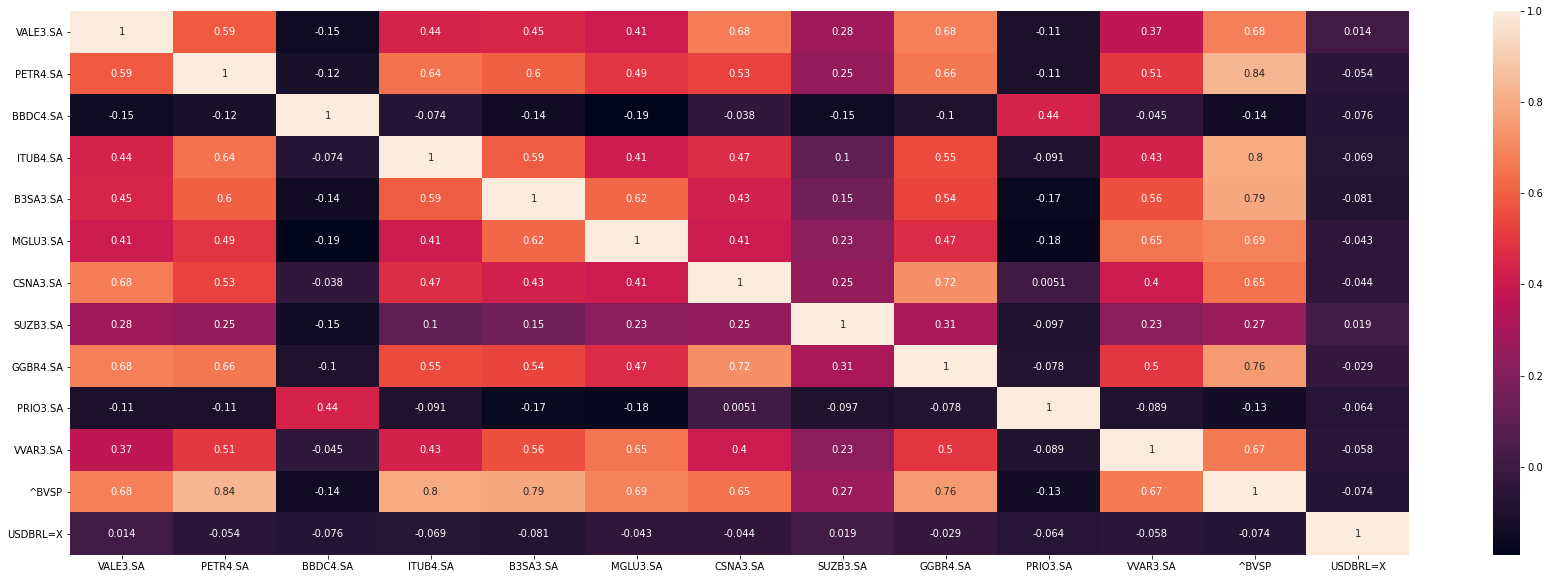

In [46]:
fig, ax= plt.subplots(figsize=(30,10))
sns.heatmap(correlacao.corr(), annot=True)

## Visualização de dados usando Plotly

In [47]:
def plot_lines(df_, columns=['Open', 'Close','High','Low']):

  fig = go.Figure()
  for c in columns:
    fig.add_trace(go.Scatter(x=list(df_.index),
                             y = df_[c],
                             mode = 'markers+lines',
                             name=c))
  return fig

In [48]:
plot_lines(df)

In [49]:
def plotCandlesStick(df, acao='ticker'):
  tracel ={
      'x':df.index,
      'open': df.Open,
      'close': df.Close,
      'high': df.High,
      'low': df.Low,
      'type': 'candlestick',
      'name': acao,
      'showlegend': False
  }

  data= [tracel]
  layout = go.Layout()

  fig = go.Figure(data=data, layout=layout)
  return fig

In [50]:
plotCandlesStick(df)